In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
seed = 10
rand = np.random.RandomState(seed)

In [4]:
# random.uniform(x, y)方法将随机生成一个实数，它在 [x,y] 范围内。

x = rand.uniform(0,1,30)      # 第一次rand.uniform()调用会生成随机均匀分布
x = np.vstack((x, x*2+1))      # 竖直堆叠序列中的数组（行方向） 调用vstack()将其他数组垂直堆叠到该数组 第三个变量与第一个变量具有完全负相关
x = np.vstack((x, -x[0,]*2+1))            # 第三个变量与第一个变量具有完全负相关
x = np.vstack((x, rand.normal(1,3,30)))  # 第四个变量是完全随机的

corr = np.corrcoef(x)  # 做相关性分析

In [5]:
x.shape

(4, 30)

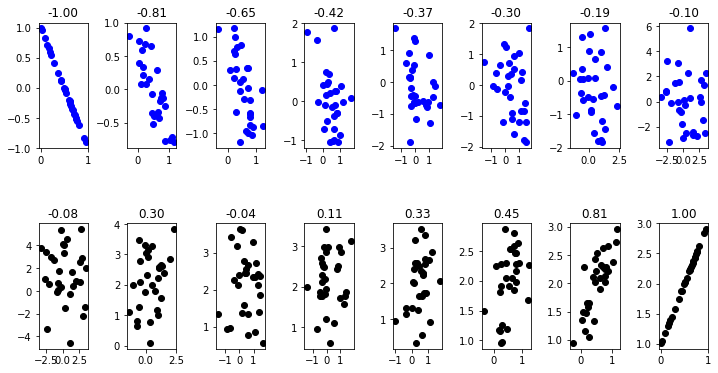

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(12, 6))  # 生成2行8列的子图

for noise, i in zip([0,0.15,0.3,0.45,0.6,0.75,0.9,2],[0,1,2,3,4,5,6,7]):
    # Add noise
    x_with_noise = x + rand.normal(0,noise,x.shape)
    
    # Compute correlation
    corr_noise = np.corrcoef(x_with_noise)
    
    # Positive correlation in row 1 and negative in row 0
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[2,],color='blue')  # 描绘图[0,0],[0,1]...[0,7] 取x中第一个元素与第三个元素做相关性分析, 必定负相关
    
    ax[1,7-i].scatter(x_with_noise[0,],x_with_noise[1,],color='black') # 描绘图[1, 0],[1,1]...[1,7] 取x中第一个元素与第二个元素做相关性分析, 必定正相关
    
    ax[0,i].title.set_text("{:.2f}".format(corr_noise[0,2]))     # 图[0,0], [0,1] ... [0,7]命名
    ax[1,7-i].title.set_text("{:.2f}".format(corr_noise[0,1]))
    
fig.subplots_adjust(wspace=0.8, hspace=0.6)    
plt.show()